## Group Details 

* group number : 82
* Group Members : 
    1.Abesundara W.H.S. ( EG/2020/ 3798 ) 
    1.Rajapaksha, R.P.M.R ( EG/2020/ 41368 ) 
* Title : Prediciting where the customer will buy a ticket or not

# Prediciting where the customer will buy a ticket or not

This notebook looks into using various Python based machine learning and data science libraries in an attempt to build a machine learning model capable of prediciting whether or not customer buy a ticket.

We're going to take the following approach:
1. Problem definition
2. Data
3. Data Evaluation
4. Data Pre Processing
4. Data Representation
5. Modelling
6. Hyper Parameter tunning

## 1. Problem Definition

In a statement,
> This dataset provides complete information about Customer behaviour for a typical Social Media page of tourism company. We need to predict where a user will buy a ticket ar not

## 2. Data

The original data came from the kaggle data from the Tourism Page Engagement Repository. https://www.kaggle.com/datasets/ddosad/customer-behaviour-tourism-portal?resource=download




## 3. Evaluation

> If we can create over 80% accuracy at prediciting a user buy a ticket or not.

## 4. Features

This is where you'll get different information about each of the features in your data

**Create data dictionary**

1. UserID - Unique ID of the user
2. Buy_ticket - Buy a ticket in the next month (target variable)
3. Yearly_avg_view_on_travel_page - Average yearly views on any travel-related page by the user
4. preferred_device - Preferred device for user login
5. total_likes_on_outstation_checkin_given - Total number of likes given by the user on out-of-station check-ins in the last year
6. yearly_avg_Outstation_checkins - Average number of out-of-station check-ins done by the user
7. member_in_family - Total number of relationships mentioned by the user in the account
8. preferred_location_type - Preferred type of location for traveling by the user
9. Yearly_avg_comment_on_travel_page - Average yearly comments on any travel-related page by the user
10. total_likes_on_outofstation_checkin_received -Total number of likes received by the user on out-of-station check-ins in the last year
11. week_since_last_outstation_checkin - Number of weeks since the last out-of-station check-in update by the user
12. following_company_page - Whether the customer is following the company page (Yes or No)
13. montly_avg_comment_on_company_page - Average monthly comments on the company page by the user
14. working_flag - Whether the customer is working or not
15. travelling_network_rating - The rating indicating if the user has close friends who also like traveling. 1 is high, 4 is lowest
16. Adult_flag - Whether the customer is an adult or not
17. Daily_Avg_mins_spend_on_traveling_page - Average time spent on the company's travel page by the user

In [391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
import plotly.express as px


In [392]:
df = pd.read_csv('/Users/hashithsithuruwan/ML Projects/ML Assignment/Customer behaviour Tourism 2.csv')
df.head(10)

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0
5,1000006,No,240.0,iOS,35175.0,1,2,Financial,79.0,3068,0,No,13,No,3,0.0,8.0
6,1000007,No,NaN,iOS and Android,46340.0,1,Three,Medical,81.0,2670,4,Yes,20,Yes,1,3.0,12.0
7,1000008,No,225.0,iOS and Android,NaN,24,1,Financial,67.0,2693,1,No,22,Yes,2,1.0,1.0
8,1000009,No,285.0,iOS,7560.0,23,3,Financial,44.0,9526,0,No,21,Yes,2,0.0,10.0
9,1000010,No,270.0,iOS and Android,45465.0,27,3,NaN,94.0,5237,6,No,13,No,2,2.0,17.0


## 3. Data Evaluation


In [393]:
print(f"Number of Rowas : {df.shape[0]}")
print(f"Number of Coloums:  {df.shape[1]}")

Number of Rowas : 11760
Number of Coloums:  17


In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

## Main infomation about the data set

* Number of Rows : 11760
* Number of Coloums:  17

And there are some coloms which does not have values,
ex ; Yearly_avg_view_on_travel_page , preferred_device


## 4. Data Pre Processing

### 4.1 Making categorical data more clear

In [395]:
# get all anique data values of the categorical
cat_columns= df.select_dtypes(exclude=['int64', 'float64'] )

for col in cat_columns:
    print(f"Value counts for column '{col}':")
    print(df[col].unique())
    print()

Value counts for column 'Taken_product':
['Yes' 'No']

Value counts for column 'preferred_device':
['iOS and Android' 'iOS' 'ANDROID' nan 'Android' 'Android OS' 'Other'
 'Others' 'Tab' 'Laptop' 'Mobile']

Value counts for column 'yearly_avg_Outstation_checkins':
['1' '24' '23' '27' '16' '15' '26' '19' '21' '11' '10' '25' '12' '18' '29'
 nan '22' '14' '20' '28' '17' '13' '*' '5' '8' '2' '3' '9' '7' '6' '4']

Value counts for column 'member_in_family':
['2' '1' '4' 'Three' '3' '5' '10']

Value counts for column 'preferred_location_type':
['Financial' 'Other' 'Medical' nan 'Game' 'Social media' 'Entertainment'
 'Tour and Travel' 'Movie' 'OTT' 'Tour  Travel' 'Beach' 'Historical site'
 'Big Cities' 'Trekking' 'Hill Stations']

Value counts for column 'following_company_page':
['Yes' 'No' 'Yeso' nan '1' '0']

Value counts for column 'working_flag':
['No' 'Yes' '0']



In [396]:
# Converting prefferec_device data to main 3 categories : Mobile, Laptop, nan
device_mapping= {'iOS and Android': 'Mobile',
          'iOS' : 'Mobile',
          'ANDROID' : 'Mobile',
          'Android': 'Mobile',
          'Android OS' : 'Mobile',
          'Other': 'Mobile',
          'Others' : 'Mobile',
          'Tab' : 'Mobile'}
df['preferred_device'] = df['preferred_device'].replace(device_mapping)
df['preferred_device'].unique()

array(['Mobile', nan, 'Laptop'], dtype=object)

In [397]:
# Change "yearly_avg_Outstation_checkins"  '* ' values to NAN
df['yearly_avg_Outstation_checkins']= df['yearly_avg_Outstation_checkins'].replace('*',np.nan)
df['yearly_avg_Outstation_checkins'] = pd.to_numeric(df['yearly_avg_Outstation_checkins'], errors='coerce', downcast='integer')

df['yearly_avg_Outstation_checkins'].unique()

array([ 1., 24., 23., 27., 16., 15., 26., 19., 21., 11., 10., 25., 12.,
       18., 29., nan, 22., 14., 20., 28., 17., 13.,  5.,  8.,  2.,  3.,
        9.,  7.,  6.,  4.])

In [398]:
# Change "member_in_family" column  "['Yes' 'No' 'Yeso' nan '1' '0']"to numeric data
page_mapping= {'Yes': 1,
          'No' : 0,
          'Yeso' : 1,
               '1' : 1, '0' : 0}
df['following_company_page'] = df['following_company_page'].replace(page_mapping)
df['following_company_page'].unique()

array([ 1.,  0., nan])

In [399]:
# Change following_company_page" columns "Three" value to 3
df['member_in_family']= df['member_in_family'].replace('Three',3)

# let's fix the datatype
df['member_in_family'] = pd.to_numeric(df['member_in_family'], errors='coerce', downcast='integer')
df['member_in_family'].unique()

array([ 2,  1,  4,  3,  5, 10], dtype=int8)

In [400]:
# Change "working_flag" column values to only "Yes" and "No"
df['working_flag']= df['working_flag'].replace('0','No')
df['working_flag'].unique()

array(['No', 'Yes'], dtype=object)

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11684 non-null  float64
 6   member_in_family                              11760 non-null  int8   
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [402]:
# Drop the UserID column
df = df.drop('UserID', axis=1)

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  object 
 1   Yearly_avg_view_on_travel_page                11179 non-null  float64
 2   preferred_device                              11707 non-null  object 
 3   total_likes_on_outstation_checkin_given       11379 non-null  float64
 4   yearly_avg_Outstation_checkins                11684 non-null  float64
 5   member_in_family                              11760 non-null  int8   
 6   preferred_location_type                       11729 non-null  object 
 7   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 9   week_since_last_outstation_checkin            11760 non-null 

### 4.2 Fixing the Missing values categorical data

In [404]:
df.isnull().sum()

Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   76
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        1
Daily_Avg_mins_spend_on_traveling_page            1
dtype: int64

In [405]:
cat_columns= df.select_dtypes(exclude=['int64', 'float64'] )
print(cat_columns.isnull().sum())

Taken_product               0
preferred_device           53
member_in_family            0
preferred_location_type    31
working_flag                0
dtype: int64


In [406]:
# Replace following_company_page colom with another value callled "unknown"
cat_columns = ['following_company_page']

for i in cat_columns:
    df[i].fillna('unknown', inplace=True)

/var/folders/02/kppp610s6c7_1k17fyzrwnbw0000gn/T/ipykernel_41900/1325773365.py:5: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [407]:
# Repalce other categorial coloms with the mode of its value
cat_columns = ['preferred_device', 'preferred_location_type', 'working_flag', 'Adult_flag']
for i in cat_columns:
    df[i].fillna(df[i].mode()[0], inplace = True)

In [408]:
cat_columns= df.select_dtypes(exclude=['int64', 'float64'] )
print(cat_columns.isnull().sum())

Taken_product              0
preferred_device           0
member_in_family           0
preferred_location_type    0
following_company_page     0
working_flag               0
dtype: int64


### 4.3 Fixing the Missing values Numarical data

In [409]:
cat_columns= df.select_dtypes(exclude=['object'] )
print(cat_columns.isnull().sum())

Yearly_avg_view_on_travel_page                  581
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   76
member_in_family                                  0
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
montly_avg_comment_on_company_page                0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            1
dtype: int64


In [410]:
# Filling all the missing values with the median of that column
num_columns = ['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given', 'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page', 'Daily_Avg_mins_spend_on_traveling_page', 'Adult_flag']
for column in num_columns:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

In [411]:
cat_columns= df.select_dtypes(exclude=['object'] )
print(cat_columns.isnull().sum())

Yearly_avg_view_on_travel_page                  0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
montly_avg_comment_on_company_page              0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64


In [412]:
df.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

## 5. Data Representation



In [413]:
# Get all the numarical data
cat_columns= df.select_dtypes(exclude=['object'] )

for col in cat_columns:
    print(f"{col}")

Yearly_avg_view_on_travel_page
total_likes_on_outstation_checkin_given
yearly_avg_Outstation_checkins
member_in_family
Yearly_avg_comment_on_travel_page
total_likes_on_outofstation_checkin_received
week_since_last_outstation_checkin
montly_avg_comment_on_company_page
travelling_network_rating
Adult_flag
Daily_Avg_mins_spend_on_traveling_page


In [414]:
# Getting the feilds which have categorical data
cat_columns= df.select_dtypes(exclude=['int64', 'float64'] )

for col in cat_columns:
    print(f"Value counts for column '{col}':")

Value counts for column 'Taken_product':
Value counts for column 'preferred_device':
Value counts for column 'member_in_family':
Value counts for column 'preferred_location_type':
Value counts for column 'following_company_page':
Value counts for column 'working_flag':


### 5.1 Distribution of categorical Data


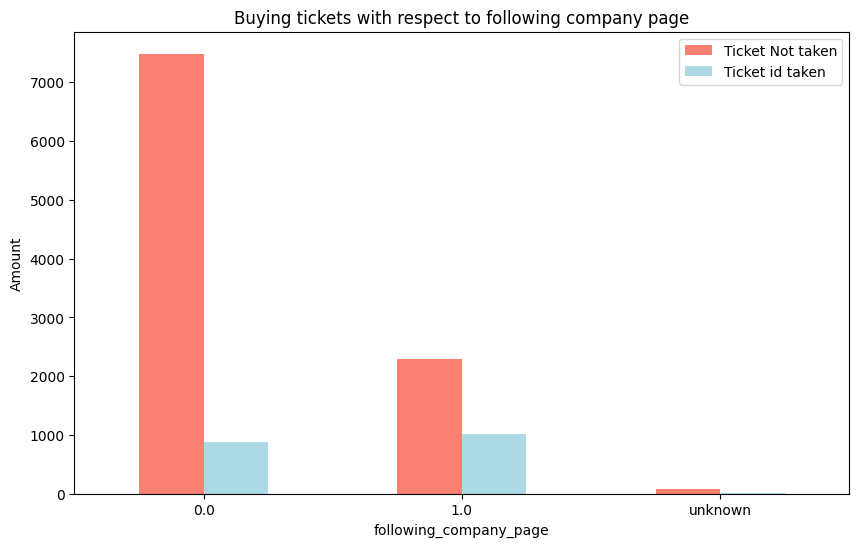

In [415]:
pd.crosstab(df.following_company_page, df.Taken_product).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon', 'lightblue'])

# Add some communication
plt.title("Buying tickets with respect to following company page")
plt.xlabel("following_company_page")
plt.ylabel("Amount")
plt.legend(["Ticket Not taken", "Ticket id taken"])
plt.xticks(rotation=0);

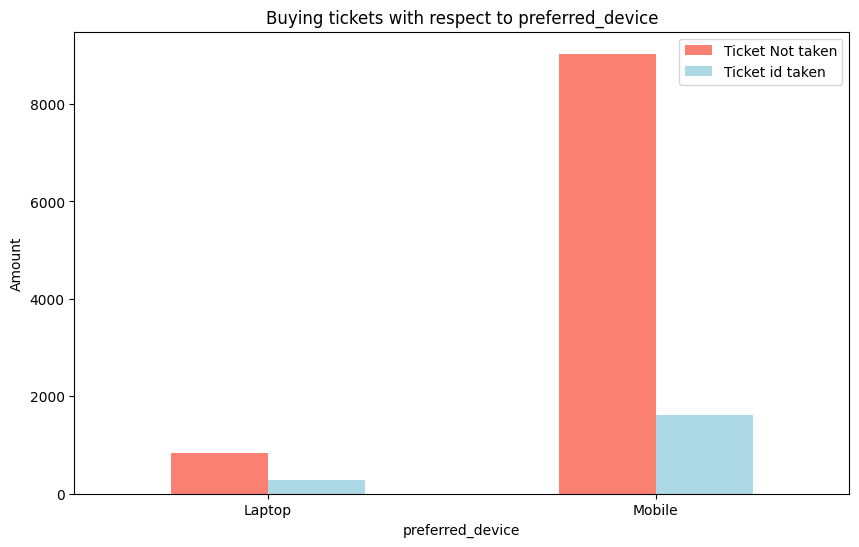

In [416]:
pd.crosstab(df.preferred_device, df.Taken_product).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon', 'lightblue'])

# Add some communication
plt.title("Buying tickets with respect to preferred_device")
plt.xlabel("preferred_device")
plt.ylabel("Amount")
plt.legend(["Ticket Not taken", "Ticket id taken"])
plt.xticks(rotation=0);

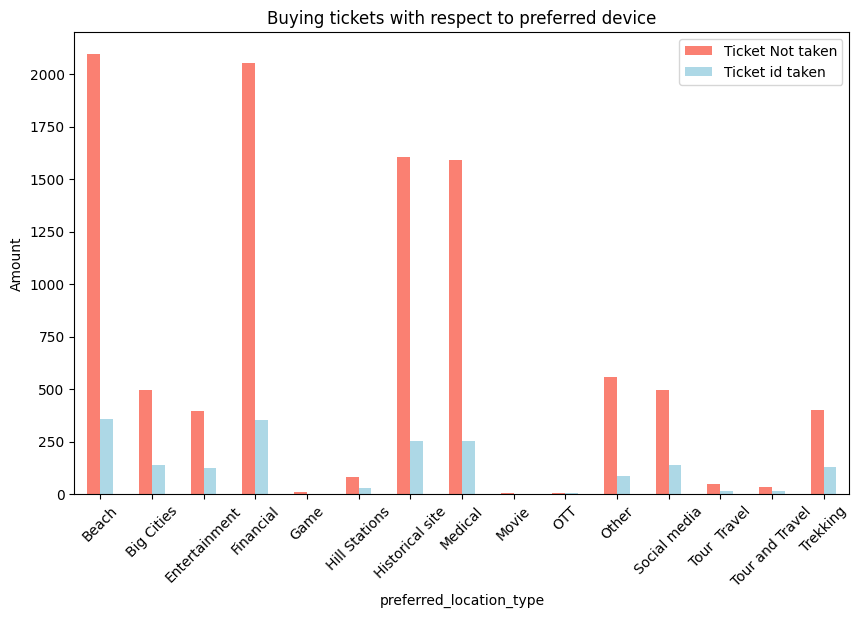

In [417]:
# Your existing code for creating the plot
pd.crosstab(df.preferred_location_type, df.Taken_product).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon', 'lightblue'])

# Add some communication
plt.title("Buying tickets with respect to preferred device")
plt.xlabel("preferred_location_type")
plt.ylabel("Amount")
plt.legend(["Ticket Not taken", "Ticket id taken"])

# Adjust the rotation angle of x-axis labels
plt.xticks(rotation=45)
# Show the plot
plt.show()


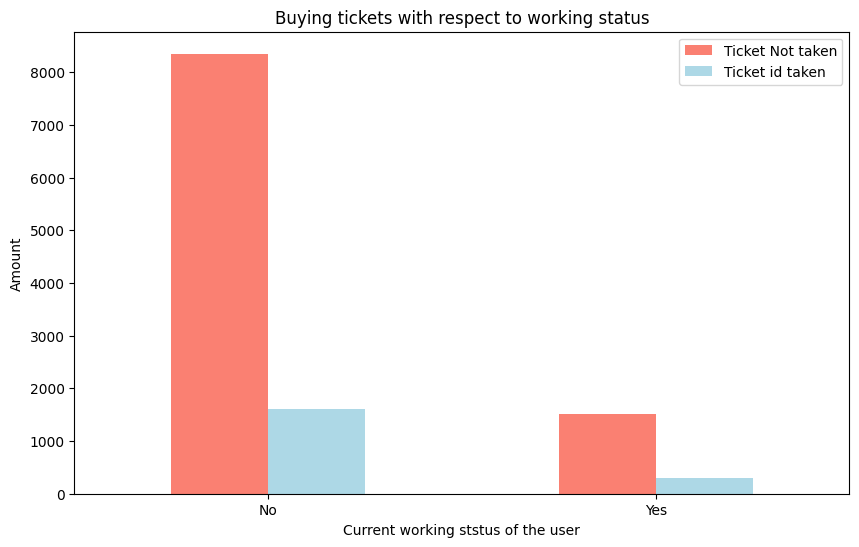

In [418]:
pd.crosstab(df.working_flag, df.Taken_product).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon', 'lightblue'])

# Add some communication
plt.title("Buying tickets with respect to working status")
plt.xlabel("Current working ststus of the user")
plt.ylabel("Amount")
plt.legend(["Ticket Not taken", "Ticket id taken"])
plt.xticks(rotation=0);


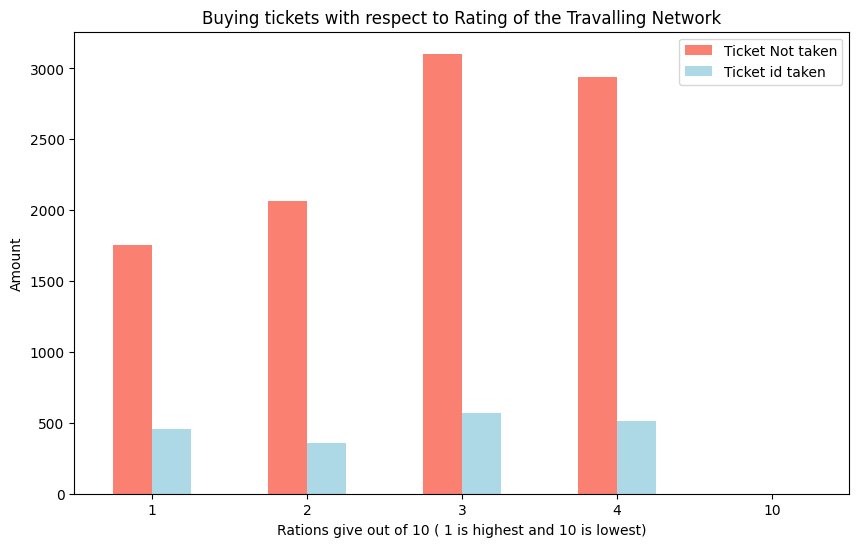

In [419]:
pd.crosstab(df.travelling_network_rating, df.Taken_product).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon', 'lightblue'])

# Add some communication
plt.title("Buying tickets with respect to Rating of the Travalling Network")
plt.xlabel("Rations give out of 10 ( 1 is highest and 10 is lowest)")
plt.ylabel("Amount")
plt.legend(["Ticket Not taken", "Ticket id taken"])
plt.xticks(rotation=0);

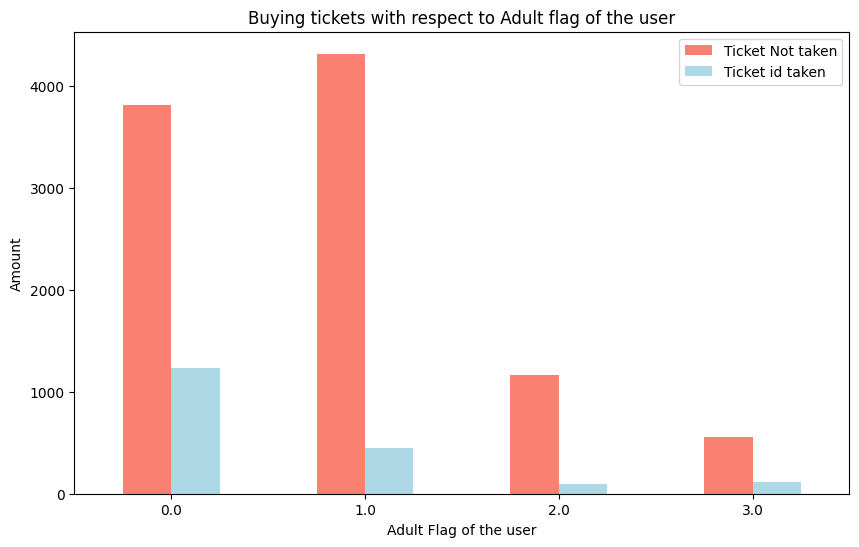

In [420]:
pd.crosstab(df.Adult_flag, df.Taken_product).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon', 'lightblue'])

# Add some communication
plt.title("Buying tickets with respect to Adult flag of the user")
plt.xlabel("Adult Flag of the user")
plt.ylabel("Amount")
plt.legend(["Ticket Not taken", "Ticket id taken"])
plt.xticks(rotation=0);

### Numarical data Representation

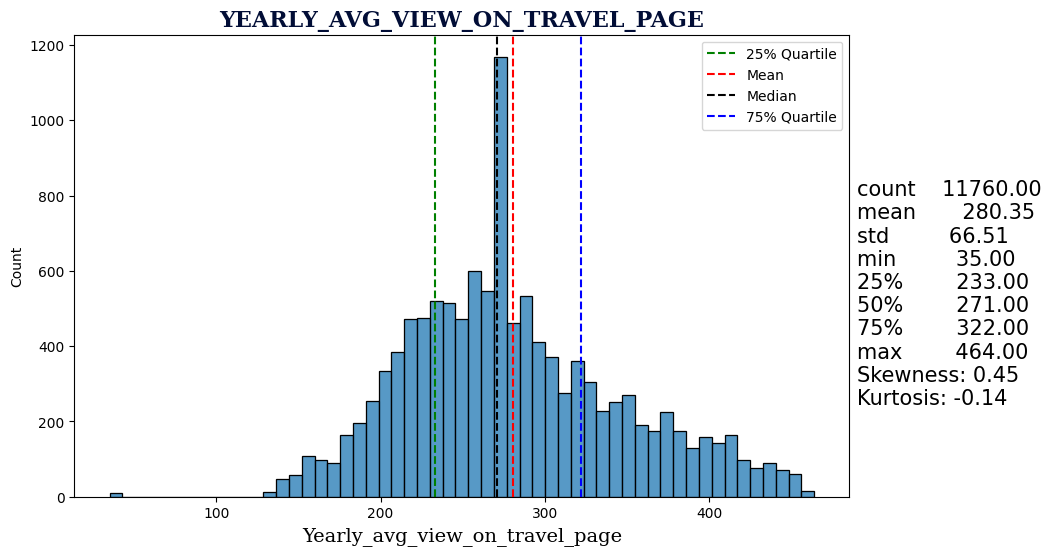

In [421]:

axtitle_dict = {'family': 'serif', 'color': '#010D36', 'weight': 'bold', 'size': 16}
axlab_dict = {'family': 'serif', 'color': 'black', 'size': 14}

plt.rcParams['axes.facecolor'] = 'white'

# Plotting 'Yearly_avg_view_on_travel_page'
column_to_plot = 'Yearly_avg_view_on_travel_page'

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram
sns.histplot(df[column_to_plot], color='#1f77b4', ax=ax)
ax.axvline(df[column_to_plot].quantile(q=0.25), color='green', linestyle='--', label='25% Quartile')
ax.axvline(df[column_to_plot].mean(), color='red', linestyle='--', label='Mean')
ax.axvline(df[column_to_plot].median(), color='black', linestyle='--', label='Median')
ax.axvline(df[column_to_plot].quantile(q=0.75), color='blue', linestyle='--', label='75% Quartile')

skewness = round(df[column_to_plot].skew(), 2)
kurtosis = round(df[column_to_plot].kurtosis(), 2)
description_lines = [line for line in str(df[column_to_plot].describe().round(2)).split('\n') if 'Name' not in line and 'dtype' not in line]
description_text = '\n'.join(description_lines)
description_text += f"\nSkewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}"
ax.annotate(description_text, xy=(1.01, 0.2), xycoords='axes fraction', fontsize=15)

ax.set_xlabel(f'{column_to_plot}', fontdict=axlab_dict)
ax.set_title(f'{column_to_plot.upper()}', fontdict=axtitle_dict)
ax.legend(fontsize=10)

plt.show()

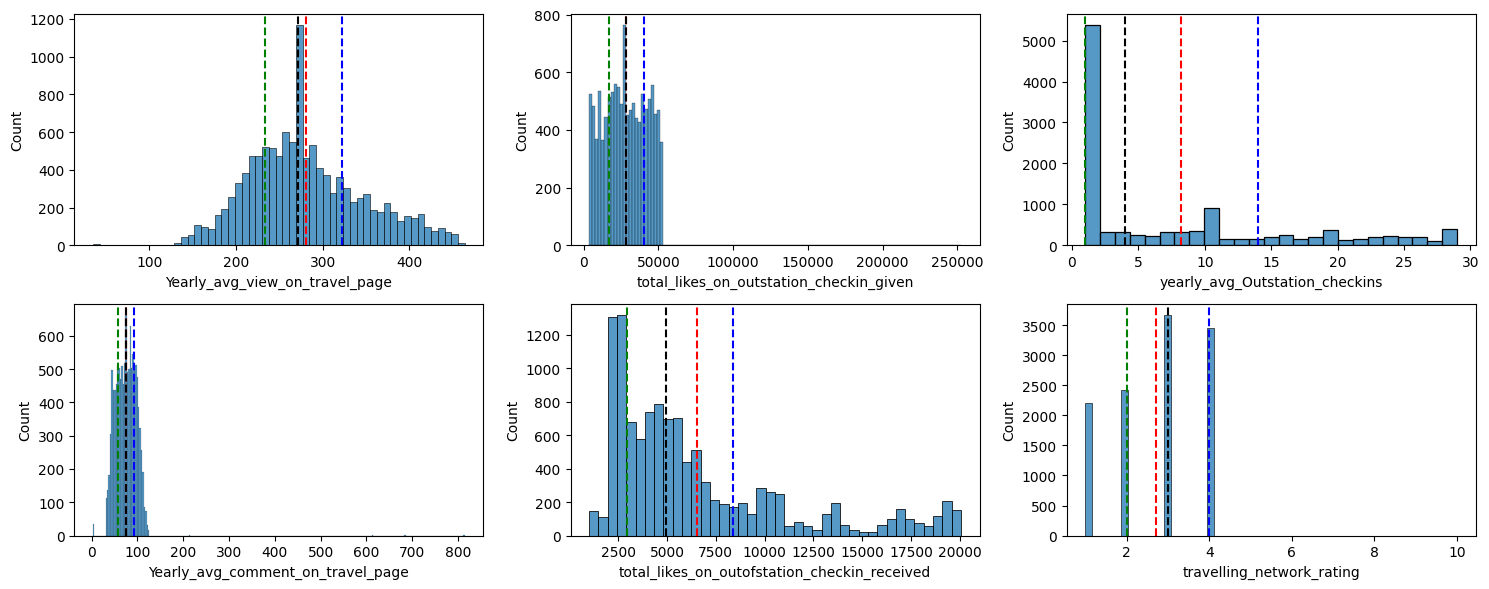

In [422]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Your existing code for creating the plot
fig, ((ax1, ax2,ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))  # Create subplots with 1 row and 2 columns

# Plotting the first bar graph
sns.histplot(df['Yearly_avg_view_on_travel_page'], color='#1f77b4', ax=ax1)
ax1.axvline(df['Yearly_avg_view_on_travel_page'].quantile(q=0.25), color='green', linestyle='--', label='25% Quartile')
ax1.axvline(df['Yearly_avg_view_on_travel_page'].mean(), color='red', linestyle='--', label='Mean')
ax1.axvline(df['Yearly_avg_view_on_travel_page'].median(), color='black', linestyle='--', label='Median')
ax1.axvline(df['Yearly_avg_view_on_travel_page'].quantile(q=0.75), color='blue', linestyle='--', label='75% Quartile')

sns.histplot(df['total_likes_on_outstation_checkin_given'], color='#1f77b4', ax=ax2)
ax2.axvline(df['total_likes_on_outstation_checkin_given'].quantile(q=0.25), color='green', linestyle='--', label='25% Quartile')
ax2.axvline(df['total_likes_on_outstation_checkin_given'].mean(), color='red', linestyle='--', label='Mean')
ax2.axvline(df['total_likes_on_outstation_checkin_given'].median(), color='black', linestyle='--', label='Median')
ax2.axvline(df['total_likes_on_outstation_checkin_given'].quantile(q=0.75), color='blue', linestyle='--', label='75% Quartile')

sns.histplot(df['yearly_avg_Outstation_checkins'], color='#1f77b4', ax=ax3)
ax3.axvline(df['yearly_avg_Outstation_checkins'].quantile(q=0.25), color='green', linestyle='--', label='25% Quartile')
ax3.axvline(df['yearly_avg_Outstation_checkins'].mean(), color='red', linestyle='--', label='Mean')
ax3.axvline(df['yearly_avg_Outstation_checkins'].median(), color='black', linestyle='--', label='Median')
ax3.axvline(df['yearly_avg_Outstation_checkins'].quantile(q=0.75), color='blue', linestyle='--', label='75% Quartile')

sns.histplot(df['Yearly_avg_comment_on_travel_page'], color='#1f77b4', ax=ax4)
ax4.axvline(df['Yearly_avg_comment_on_travel_page'].quantile(q=0.25), color='green', linestyle='--', label='25% Quartile')
ax4.axvline(df['Yearly_avg_comment_on_travel_page'].mean(), color='red', linestyle='--', label='Mean')
ax4.axvline(df['Yearly_avg_comment_on_travel_page'].median(), color='black', linestyle='--', label='Median')
ax4.axvline(df['Yearly_avg_comment_on_travel_page'].quantile(q=0.75), color='blue', linestyle='--', label='75% Quartile')

sns.histplot(df['total_likes_on_outofstation_checkin_received'], color='#1f77b4', ax=ax5)
ax5.axvline(df['total_likes_on_outofstation_checkin_received'].quantile(q=0.25), color='green', linestyle='--', label='25% Quartile')
ax5.axvline(df['total_likes_on_outofstation_checkin_received'].mean(), color='red', linestyle='--', label='Mean')
ax5.axvline(df['total_likes_on_outofstation_checkin_received'].median(), color='black', linestyle='--', label='Median')
ax5.axvline(df['total_likes_on_outofstation_checkin_received'].quantile(q=0.75), color='blue', linestyle='--', label='75% Quartile')

sns.histplot(df['travelling_network_rating'], color='#1f77b4', ax=ax6)
ax6.axvline(df['travelling_network_rating'].quantile(q=0.25), color='green', linestyle='--', label='25% Quartile')
ax6.axvline(df['travelling_network_rating'].mean(), color='red', linestyle='--', label='Mean')
ax6.axvline(df['travelling_network_rating'].median(), color='black', linestyle='--', label='Median')
ax6.axvline(df['travelling_network_rating'].quantile(q=0.75), color='blue', linestyle='--', label='75% Quartile')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### Converting Object data into int data

In [423]:
# Drop the preferred_location_type column
df1 = df.drop('preferred_location_type', axis=1)

In [424]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  object 
 1   Yearly_avg_view_on_travel_page                11760 non-null  float64
 2   preferred_device                              11760 non-null  object 
 3   total_likes_on_outstation_checkin_given       11760 non-null  float64
 4   yearly_avg_Outstation_checkins                11760 non-null  float64
 5   member_in_family                              11760 non-null  int8   
 6   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 7   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 8   week_since_last_outstation_checkin            11760 non-null  int64  
 9   following_company_page                        11760 non-null 

In [425]:
# Get catelogical data colums
cat_columns= df1.select_dtypes(exclude=['int64', 'float64'] )

for col in cat_columns:
    print(f"{col}")
    print(df[col].unique())
    print()

cat_columns= df1.select_dtypes(exclude=['int64', 'float64'] )

df_cat = pd.DataFrame(cat_columns)
df_cat.head()

Taken_product
['Yes' 'No']

preferred_device
['Mobile' 'Laptop']

member_in_family
[ 2  1  4  3  5 10]

following_company_page
[1.0 0.0 'unknown']

working_flag
['No' 'Yes']



,Taken_product,preferred_device,member_in_family,following_company_page,working_flag
0,Yes,Mobile,2,1.0,No
1,No,Mobile,1,0.0,Yes
2,Yes,Mobile,2,1.0,No
3,No,Mobile,4,1.0,No
4,No,Mobile,1,0.0,No


In [426]:
# Done the one-hot encoding to Taken_product, preferred_device, working_flag colums
df_encoded = pd.get_dummies(df_cat, columns=['Taken_product', 'preferred_device', 'working_flag'])
df_encoded.head()


,member_in_family,following_company_page,Taken_product_No,Taken_product_Yes,preferred_device_Laptop,preferred_device_Mobile,working_flag_No,working_flag_Yes
0,2,1.0,False,True,False,True,True,False
1,1,0.0,True,False,False,True,False,True
2,2,1.0,False,True,False,True,True,False
3,4,1.0,True,False,False,True,True,False
4,1,0.0,True,False,False,True,True,False


In [427]:
# Drop extra columns
categories_to_be_dropped = ['Taken_product_No', 'preferred_device_Laptop', 'working_flag_No']
df_encoded = df_encoded.drop(categories_to_be_dropped, axis=1)
df_encoded.head()



,member_in_family,following_company_page,Taken_product_Yes,preferred_device_Mobile,working_flag_Yes
0,2,1.0,True,True,False
1,1,0.0,False,True,True
2,2,1.0,True,True,False
3,4,1.0,False,True,False
4,1,0.0,False,True,False


In [428]:
# Rename the colums
renamed_categories = {
    'preferred_device_Mobile':'preferred_device_Mobile',
    'working_flag_Yes':'Is_working',
    'Taken_product_Yes' : "Is Prodcut taken"
}
df_encoded=df_encoded.rename(columns=renamed_categories)
df_encoded.head()

,member_in_family,following_company_page,Is Prodcut taken,preferred_device_Mobile,Is_working
0,2,1.0,True,True,False
1,1,0.0,False,True,True
2,2,1.0,True,True,False
3,4,1.0,False,True,False
4,1,0.0,False,True,False


In [429]:
df_encoded['Is Prodcut taken'] = df_encoded['Is Prodcut taken'].astype(int)
df_encoded['preferred_device_Mobile'] = df_encoded['preferred_device_Mobile'].astype(int)
df_encoded['Is_working'] = df_encoded['Is_working'].astype(int)




df_encoded.head()
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   member_in_family         11760 non-null  int8  
 1   following_company_page   11760 non-null  object
 2   Is Prodcut taken         11760 non-null  int64 
 3   preferred_device_Mobile  11760 non-null  int64 
 4   Is_working               11760 non-null  int64 
dtypes: int64(3), int8(1), object(1)
memory usage: 379.1+ KB


In [430]:

categories_to_be_dropped = ['following_company_page']
df_encoded = df_encoded.drop(categories_to_be_dropped, axis=1)
df_encoded.head()

,member_in_family,Is Prodcut taken,preferred_device_Mobile,Is_working
0,2,1,1,0
1,1,0,1,1
2,2,1,1,0
3,4,0,1,0
4,1,0,1,0


In [431]:


categories_to_be_dropped = ['member_in_family', 'following_company_page', 'preferred_device', 'Taken_product', 'preferred_location_type', 'working_flag']
df2 = df.drop(categories_to_be_dropped, axis=1)
df2.head()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Yearly_avg_view_on_travel_page                11760 non-null  float64
 1   total_likes_on_outstation_checkin_given       11760 non-null  float64
 2   yearly_avg_Outstation_checkins                11760 non-null  float64
 3   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 4   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 5   week_since_last_outstation_checkin            11760 non-null  int64  
 6   montly_avg_comment_on_company_page            11760 non-null  int64  
 7   travelling_network_rating                     11760 non-null  int64  
 8   Adult_flag                                    11760 non-null  float64
 9   Daily_Avg_mins_spend_on_traveling_page        11760 non-null 

In [432]:
df1 = df.drop('preferred_location_type', axis=1)

# The concatanate the encoded data frame and the original data frmae
df1= pd.concat([df2,df_encoded],axis=1)
df1.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,member_in_family,Is Prodcut taken,preferred_device_Mobile,Is_working
0,307.0,38570.0,1.0,94.0,5993,8,11,1,0.0,8.0,2,1,1,0
1,367.0,9765.0,1.0,61.0,5130,1,23,4,1.0,10.0,1,0,1,1
2,277.0,48055.0,1.0,92.0,2090,6,15,2,0.0,7.0,2,1,1,0
3,247.0,48720.0,1.0,56.0,2909,1,11,3,0.0,8.0,4,0,1,0
4,202.0,20685.0,1.0,40.0,3468,9,12,4,1.0,6.0,1,0,1,0


In [433]:
df1.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,member_in_family,Is Prodcut taken,preferred_device_Mobile,Is_working
0,307.0,38570.0,1.0,94.0,5993,8,11,1,0.0,8.0,2,1,1,0
1,367.0,9765.0,1.0,61.0,5130,1,23,4,1.0,10.0,1,0,1,1
2,277.0,48055.0,1.0,92.0,2090,6,15,2,0.0,7.0,2,1,1,0
3,247.0,48720.0,1.0,56.0,2909,1,11,3,0.0,8.0,4,0,1,0
4,202.0,20685.0,1.0,40.0,3468,9,12,4,1.0,6.0,1,0,1,0


In [434]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Yearly_avg_view_on_travel_page                11760 non-null  float64
 1   total_likes_on_outstation_checkin_given       11760 non-null  float64
 2   yearly_avg_Outstation_checkins                11760 non-null  float64
 3   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 4   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 5   week_since_last_outstation_checkin            11760 non-null  int64  
 6   montly_avg_comment_on_company_page            11760 non-null  int64  
 7   travelling_network_rating                     11760 non-null  int64  
 8   Adult_flag                                    11760 non-null  float64
 9   Daily_Avg_mins_spend_on_traveling_page        11760 non-null 

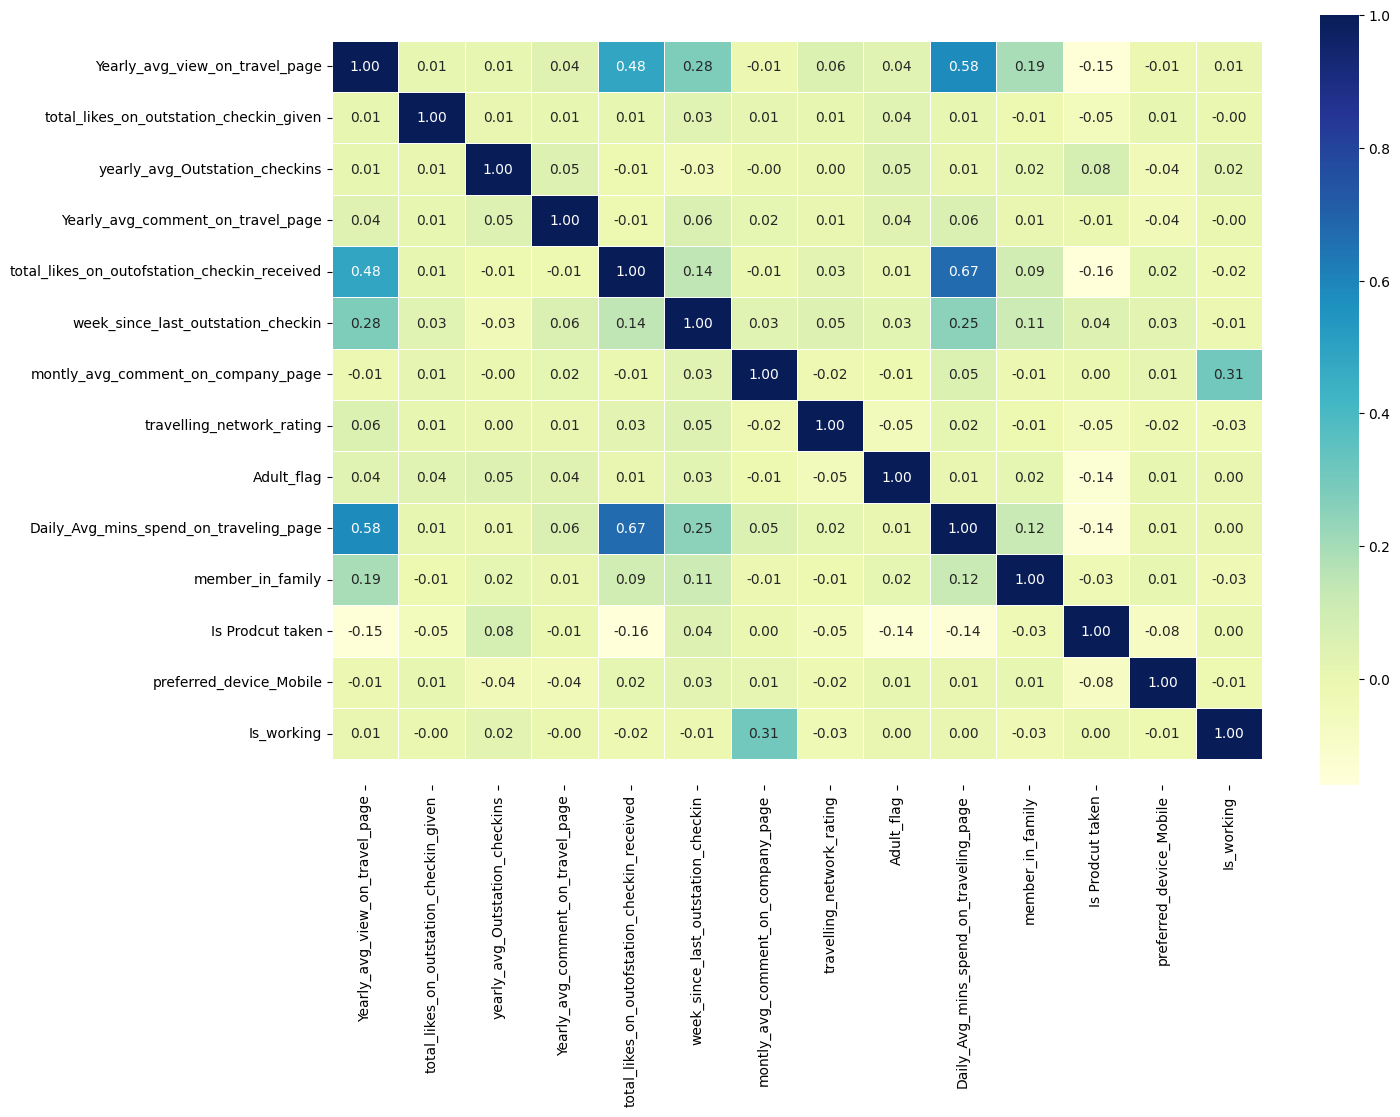

In [435]:
corr_matrix=df1.corr()
fig, ax =plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");

bottom ,top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5);

## 6. Modelling (Tranning the Model)

In [436]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [437]:
X = df1.drop('Is Prodcut taken', axis=1)
y = df1['Is Prodcut taken']

In [438]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [439]:
# Standerdising the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.fit_transform(X_test)

In [440]:
# Logistic Regression

model = LogisticRegression()
model.fit(X_train1, y_train)

# Make predictions
y_pred = model.predict(X_test1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8371598639455783
Confusion Matrix:
[[1951    7]
 [ 376   18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1958
           1       0.72      0.05      0.09       394

    accuracy                           0.84      2352
   macro avg       0.78      0.52      0.50      2352
weighted avg       0.82      0.84      0.77      2352



In [441]:
# Decision tree
model = DecisionTreeClassifier()
model.fit(X_train1, y_train)

# Make predictions
y_pred = model.predict(X_test1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9562074829931972
Confusion Matrix:
[[1918   40]
 [  63  331]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1958
           1       0.89      0.84      0.87       394

    accuracy                           0.96      2352
   macro avg       0.93      0.91      0.92      2352
weighted avg       0.96      0.96      0.96      2352



## 7. Hyper parameter tunnig

### hyperparameter tunning for Logistic regression

In [442]:
#hyperparameter tunning for Logistic regression

from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values for the h
param_grid = [
    {'penalty' : [ 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

clf = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)


In [443]:
best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212)

In [444]:

# Adding hyperparameters
model = LogisticRegression(C=0.2)
model.fit(X_train1, y_train)

# Make predictions
y_predLinear = model.predict(X_test1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predLinear)
conf_matrix = confusion_matrix(y_test, y_predLinear)
classification_rep = classification_report(y_test, y_predLinear)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8363095238095238
Confusion Matrix:
[[1951    7]
 [ 378   16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1958
           1       0.70      0.04      0.08       394

    accuracy                           0.84      2352
   macro avg       0.77      0.52      0.49      2352
weighted avg       0.81      0.84      0.77      2352



hyperparameter tunning for Decision Tree

In [445]:

model = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by grid search

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [446]:
best_params = grid_search.best_params_

In [447]:
model = DecisionTreeClassifier(**best_params)
model.fit(X_train1, y_train)

# Make predictions
y_predDecision = model.predict(X_test1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predDecision)
conf_matrix = confusion_matrix(y_test, y_predDecision)
classification_rep = classification_report(y_test, y_predDecision)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9655612244897959
Confusion Matrix:
[[1923   35]
 [  46  348]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1958
           1       0.91      0.88      0.90       394

    accuracy                           0.97      2352
   macro avg       0.94      0.93      0.94      2352
weighted avg       0.97      0.97      0.97      2352



## Comparision between two modles

In [448]:
from sklearn.metrics import classification_report

# Assuming y_true is the true labels
report_model1 = classification_report(y_test, y_predLinear)
report_model2 = classification_report(y_test, y_predDecision)

print("Classification Report Model 1:\n", report_model1)
print("Classification Report Model 2:\n", report_model2)

Classification Report Model 1:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1958
           1       0.70      0.04      0.08       394

    accuracy                           0.84      2352
   macro avg       0.77      0.52      0.49      2352
weighted avg       0.81      0.84      0.77      2352

Classification Report Model 2:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1958
           1       0.91      0.88      0.90       394

    accuracy                           0.97      2352
   macro avg       0.94      0.93      0.94      2352
weighted avg       0.97      0.97      0.97      2352



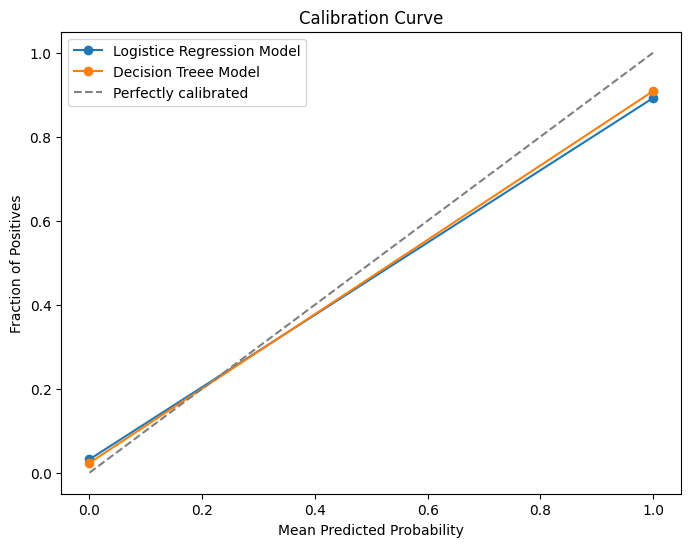

In [449]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

prob_true_model1, prob_pred_model1 = calibration_curve(y_test, y_pred, n_bins=10)
prob_true_model2, prob_pred_model2 = calibration_curve(y_test, y_predDecision, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred_model1, prob_true_model1, marker='o', label='Logistice Regression Model')
plt.plot(prob_pred_model2, prob_true_model2, marker='o', label='Decision Treee Model')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()